In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#import photoevolver as ph
from photoevolver import models
from photoevolver.planet import Planet

## Planet structure from mass and radius

In [2]:
"""
First, we create a planet with e.g. radius 2.5 Earth radii and mass 5 Earth masses,
and has an orbital period of 5 days.
"""
planet = Planet(mass = 5.0, radius = 2.5, period = 5)

In [3]:
"""
We then provide the models that will define how the planet's core, envelope, and host star
behave.
"""
planet.set_models(
    core_model = models.core_otegi20,
    envelope_model = models.envelope_chen16,
    mass_loss_model = models.massloss_energy_limited,
    star_model = {
        'mass': 1.0,
        'lx'   : lambda state,mkw: 1e28, # erg/s
        'leuv' : lambda state,mkw: 1e28, # erg/s
        'lbol' : lambda state,mkw: 1e33
    },
    # model_args = dict(ot20_errors = False)
)


In [4]:
"""
Now that the planet's parameters and models have been set up,
you can solve for its internal structure, namely its core and envelope parameters.
"""
structure = planet.solve_structure(age=1000.0)

"""
With this configuration, at the age of 100 Myr, the models tell us
the planet has a rocky core radius (`mcore`) of 1.6 Earth radii, about 60% of the planet's size,
and a gaseous envelope consisting on 1% of the planet's mass (`fenv`).
"""
structure

EvoState(mass=5.0, radius=2.5, mcore=4.927136544860114, rcore=1.6356472888171172, fenv=0.014788194821979423, renv=0.8643527111828828, period=5, sep=0.057224374150792415, mstar=1.0, lx=1e+28, leuv=1e+28, lbol=1e+33, age=1000.0, tstep=None)

## Planet evolution

In [5]:
"""
Now we can evolve the planet's envelope under thermal contraction and evaporation
until the age of 2 Gyr with a fixed step size of 0.1 Myr.
This function `evolve` performs the computation and returns a pandas data frame
with columns for each simulation parameter, and rows that hold the value
of these parameters on each time step.
"""
evo_df = planet.evolve(start=1000.0, end=10.0, step=0.1, progressbar=True)
evo_df

97.960%|█████████████████████████████████████████████████████████████████████████████████████▏ | 969.800/990.0 [00:04<00:00]/home/jorge/dev/.venv/lib/python3.10/site-packages/tqdm/std.py:533: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100.000%|██████████████████████████████████████████████████████████████████████████████████████| 990.000/990.0 [00:04<00:00]


,mass,radius,mcore,rcore,fenv,renv,period,sep,mstar,lx,leuv,lbol,age,tstep
0,5.000000,2.500000,4.927137,1.635647,0.014788,0.864353,5,0.057224,1.0,1.000000e+28,1.000000e+28,1.000000e+33,1000.0,0.1
1,5.000001,2.500008,4.927137,1.635647,0.014788,0.864360,5,0.057224,1.0,1.000000e+28,1.000000e+28,1.000000e+33,1000.0,0.1
2,5.000003,2.500022,4.927137,1.635647,0.014789,0.864375,5,0.057224,1.0,1.000000e+28,1.000000e+28,1.000000e+33,999.9,0.1
3,5.000004,2.500037,4.927137,1.635647,0.014789,0.864390,5,0.057224,1.0,1.000000e+28,1.000000e+28,1.000000e+33,999.8,0.1
4,5.000005,2.500052,4.927137,1.635647,0.014789,0.864404,5,0.057224,1.0,1.000000e+28,1.000000e+28,1.000000e+33,999.7,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9897,5.015013,2.925949,4.927137,1.635647,0.017835,1.290302,5,0.057224,1.0,1.000000e+28,1.000000e+28,1.000000e+33,10.4,0.1
9898,5.015016,2.926587,4.927137,1.635647,0.017836,1.290940,5,0.057224,1.0,1.000000e+28,1.000000e+28,1.000000e+33,10.3,0.1
9899,5.015018,2.927231,4.927137,1.635647,0.017836,1.291584,5,0.057224,1.0,1.000000e+28,1.000000e+28,1.000000e+33,10.2,0.1
9900,5.015020,2.927880,4.927137,1.635647,0.017837,1.292233,5,0.057224,1.0,1.000000e+28,1.000000e+28,1.000000e+33,10.1,0.1


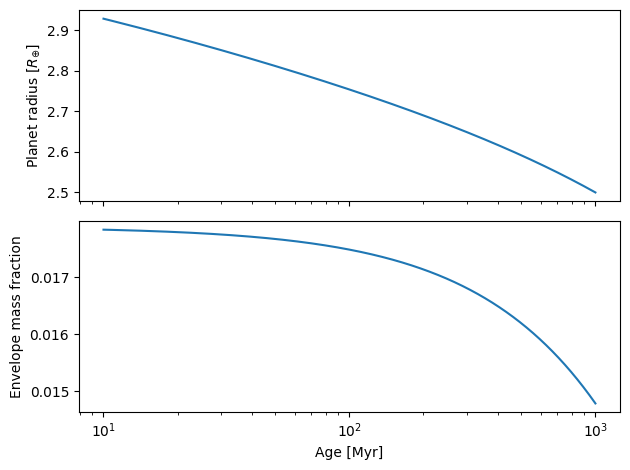

In [6]:
"""
Now we will plot the radius and mass evolution of the planet.
"""

fig, (axr, axm) = plt.subplots(nrows = 2, dpi = 100, sharex = True)

axr.set_xscale('log')
axm.set_xlabel('Age [Myr]')
axr.set_ylabel(r'Planet radius [$R_{\oplus}$]')
axm.set_ylabel(r'Envelope mass fraction')

axr.plot(evo_df['age'], evo_df['radius'])
axm.plot(evo_df['age'], evo_df['fenv'])

plt.tight_layout()

In [31]:
"""
With mass loss enabled, the planet loses its envelope by the age of about 55 Myr.
Without mass loss, the envelope simply contracts following as it cools down.
"""

EllipsisType = type(...)
setattr(EllipsisType, "__call__", )
EllipsisType.__call__ = lambda self: EllipsisType
EllipsisType()

TypeError: cannot set '__call__' attribute of immutable type 'ellipsis'